Saved ensemble_violin_plot_fut.png


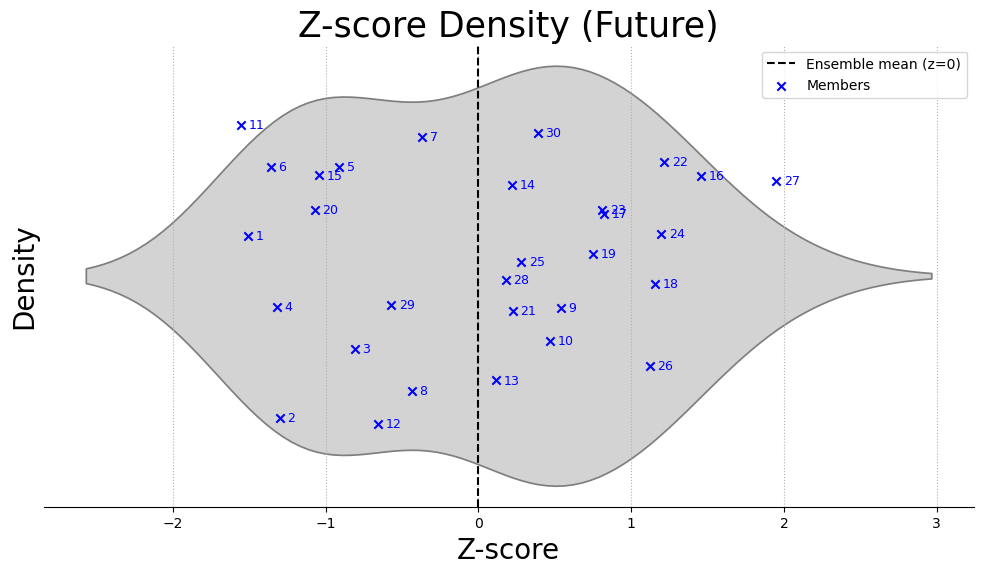

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import os # Added for file existence check

# --- 1. Load Your Data ---
# In your real script, replace this with:
# df = pd.read_csv('ensemble_member_stats_hist.csv')

# Dummy data for demonstration if file not found
try:
    df = pd.read_csv('/nbhome/Soelem.Bhuiyan/basic_QA_SPEARMED_precip/outputs/tables/ensemble_member_stats_hist.csv')
except FileNotFoundError:
    print("Error: 'ensemble_member_stats_hist.csv' not found. Using dummy data for demonstration.")
    data = {
        'member': [f'pp_ens_{i:02d}' for i in range(1, 31)],
        'mean': np.random.normal(loc=3.08e-5, scale=5e-7, size=30),
        'std_dev': np.random.normal(loc=1.28e-4, scale=5e-7, size=30),
        'error': ['' for _ in range(30)]
    }
    # Manually make one an "outlier" for visual testing if needed
    data['mean'][16] = 3.095e-5 # Example to create an outlier for higher Z-score
    df = pd.DataFrame(data)


# --- 2. Data Preprocessing & Statistics ---

# Extract member index number for plotting
if 'member' in df.columns:
    df['member_index'] = df['member'].str.split('_').str[-1].astype(int)
    df = df.sort_values('member_index').reset_index(drop=True)
else:
    df['member_index'] = df.index + 1 # Fallback for dummy data


# Calculate ensemble mean and std dev of the means
mean_of_means = df['mean_precip_mm_day'].mean()
std_of_means = df['mean_precip_mm_day'].std()

# Calculate Z-score for each member's mean
df['mean_z'] = (df['mean_precip_mm_day'] - mean_of_means) / std_of_means

# --- 3. Plot 2: Horizontal Violin Plot ---

# Define the outlier threshold (still used for potential orange lines if you re-add them, or for context)
OUTLIER_THRESHOLD_Z = 3.0

# Create figure
plt.figure(figsize=(12, 6))

# Plot the violin plot first (in the background)
sns.violinplot(x=df['mean_z'], color='lightgrey', inner=None) # 'inner=None' removes the boxplot inside

# Plot the central mean line
plt.axvline(0, color='black', linestyle='--', label='Ensemble mean (z=0)')

# --- MODIFICATION START ---
# We no longer separate into df_normal and df_outlier for plotting points.
# Instead, we plot ALL members using a single style.

# Create random y-values for jitter for ALL members
np.random.seed(42) # for reproducible jitter
df['jitter_y'] = np.random.uniform(-0.3, 0.3, len(df))

# Plot all individual members as a scatter plot with blue 'x' markers
plt.scatter(df['mean_z'], df['jitter_y'], 
            marker='x', color='blue', label='Members') # Changed label for clarity

# Add text labels for ALL points in blue
for _, row in df.iterrows():
    plt.text(row['mean_z'] + 0.05, row['jitter_y'], int(row['member_index']), 
             fontsize=9, color='blue', ha='left', va='center')

# --- MODIFICATION END ---

# Final plot formatting
plt.title('Z-score Density (Future)', fontsize=25)
plt.xlabel('Z-score', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.yticks([]) # Remove y-axis ticks
plt.legend()
plt.grid(True, linestyle=':', axis='x')
sns.despine(left=True) # Remove left y-axis spine

# Only save if we loaded the real file
if 'member' in df.columns and 'pp_ens_01' in df['member'].values: # Simple check for real data
    plt.savefig("ensemble_mean_violin_plot_hist.png")
    print("Saved ensemble_violin_plot_fut.png")
else:
    print("Plot generated, but not saved (using dummy data).")

# plt.show() # Use plt.show() to display interactively